In [1]:
# ==============imports===================
import pandas as pd
import os

import matplotlib.pyplot as plt

import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
# ==================args=====================
# checkpoints = ['50000', '100000', '150000', '200000']
# checkpoints = ['1000', '10000', '100000', '200000', '300000', '400000', '500000', '600000']
# checkpoints = ['1000', '100000', '200000', '300000', '400000', '600000']

# plt.style.use('ggplot')

{'Gender': {'best': 0.2385714285714285, '1000': 0.0735714285714285, '100000': 0.1385714285714286, '200000': 0.1635714285714285, '300000': 0.1892857142857142, '400000': 0.1957142857142857, '600000': 0.0578571428571428}, 'Number': {'best': 0.1974545454545454, '1000': 0.0712727272727272, '100000': 0.1283636363636363, '200000': 0.1567272727272727, '300000': 0.1556363636363636, '400000': 0.168, '600000': 0.0512727272727272}, 'POS': {'best': 0.1351282051282051, '1000': 0.0594871794871794, '100000': 0.0882051282051282, '200000': 0.0946153846153846, '300000': 0.1205128205128205, '400000': 0.1328205128205128, '600000': 0.0435897435897435}}
[1000, 100000, 200000, 300000, 400000, 600000]
dict_values([0.0735714285714285, 0.1385714285714286, 0.1635714285714285, 0.1892857142857142, 0.1957142857142857, 0.0578571428571428])
[1000, 100000, 200000, 300000, 400000, 600000]
dict_values([0.0712727272727272, 0.1283636363636363, 0.1567272727272727, 0.1556363636363636, 0.168, 0.0512727272727272])
[1000, 10000

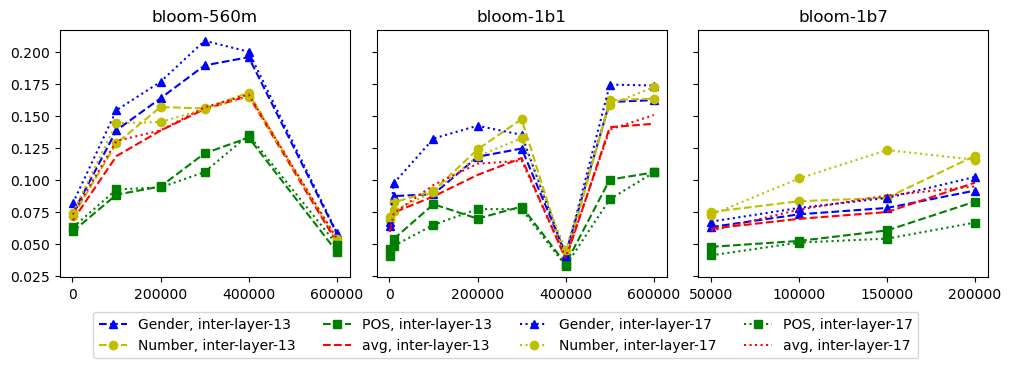

In [6]:
# ======================read cos similarities==============================
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, layout="constrained", figsize=(10,3))
model_index = 0
for model in ['bloom-560m', 'bloom-1b1', 'bloom-1b7']:

    lines = ['--', ':']
    line_index = 0
    for l in ['inter-layer-13', 'inter-layer-17']:


        ovlp_dict = pd.read_csv(f'csv_files/{model}_{l}_avg-ovlp-rate-by-ctgr.csv', index_col=0).to_dict()

        print(ovlp_dict)
        shapes = {'Gender':'^', 'Number':'o', 'POS':'s'}
        colors = {'Gender':'b', 'Number':'y', 'POS':'g'}
        attr_index = 0
        for attr, avg_ovlp_rate in ovlp_dict.items():
            del avg_ovlp_rate['best']
            x = [int(x) for x in avg_ovlp_rate.keys()]
            y = avg_ovlp_rate.values()
            print(x)
            print(y)
            axs[model_index].plot(x, y, f"{colors[attr]}{shapes[attr]}{lines[line_index]}", label=f'{attr}, {l}')
            axs[model_index].set_title(model)
            attr_index += 1


        with open(f'csv_files/{model}_{l}_avg-ovlp-rate-by-ckpt.txt', 'r') as f:
            read_lines = f.readlines()
            avg_ovlp_dict = {}
            for line in read_lines:
                list = line.split(',')
                if list[0] == 'best':
                    continue
                avg_ovlp_dict[int(list[0])] = float(list[1])
            ckpts, avg_ovlps = zip(*avg_ovlp_dict.items())
            axs[model_index].plot(ckpts, avg_ovlps, f"r{lines[line_index]}", label=f'avg, {l}')
        line_index += 1
    
    model_index += 1

labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc = "upper center",
   bbox_to_anchor = (0.5, 0),
   bbox_transform = plt.gcf().transFigure,
   ncol=4
)

plt.savefig(f'experiments/scatterplots/alignment.pdf', bbox_inches='tight')

In [4]:
# ===========================read overlap ratios============================


<Figure size 640x480 with 0 Axes>